In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, scatter_matrix
import seaborn as sns
from numpy import arange
from pylab import pcolor, colorbar, xticks, yticks, show


In [3]:
# Load data
aapl = pd.read_csv("3250_Assignment 3_aapl.csv", parse_dates=["Date"], index_col="Date")
amzn = pd.read_csv("3250_Assignment 3_amzn.csv", parse_dates=["Date"], index_col="Date")
ebay = pd.read_csv("3250_Assignment 3_ebay.csv", parse_dates=["Date"], index_col="Date")
intc = pd.read_csv("3250_Assignment 3_INTC.csv", parse_dates=["Date"], index_col="Date")


In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-28,63.435715,63.981430,63.057144,63.057144,47.371712,80628800
2013-03-01,62.571430,62.597141,61.425713,61.495716,46.198692,138112100
2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900
2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400
2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500
...,...,...,...,...,...,...
2018-02-22,171.800003,173.949997,171.710007,172.500000,172.500000,30991900
2018-02-23,173.669998,175.649994,173.539993,175.500000,175.500000,33812400
2018-02-26,176.350006,179.389999,176.210007,178.970001,178.970001,38162200


In [5]:
amzn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-28,261.809998,267.000000,260.630005,264.269989,264.269989,2667200
2013-03-01,263.269989,266.600006,261.040009,265.739990,265.739990,2957000
2013-03-04,265.359985,273.299988,264.140015,273.109985,273.109985,3453000
2013-03-05,274.000000,276.679993,269.989990,275.589996,275.589996,3686200
2013-03-06,275.760010,276.489990,271.829987,273.790009,273.790009,2050700
...,...,...,...,...,...,...
2018-02-22,1495.359985,1502.540039,1475.760010,1485.339966,1485.339966,4858100
2018-02-23,1495.339966,1500.000000,1486.500000,1500.000000,1500.000000,4418100
2018-02-26,1509.199951,1522.839966,1507.000000,1521.949951,1521.949951,4955000


In [6]:
ebay

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-28,43.22,43.420,42.850,42.86,8344453.0,0.0,1.0,43.220000,43.420000,42.850000,42.860000,8344453.0
2018-02-27,43.82,43.950,43.130,43.15,9152950.0,0.0,1.0,43.820000,43.950000,43.130000,43.150000,9152950.0
2018-02-26,43.80,44.360,43.650,43.83,6366809.0,0.0,1.0,43.800000,44.360000,43.650000,43.830000,6366809.0
2018-02-23,43.27,43.785,42.815,43.68,11101710.0,0.0,1.0,43.270000,43.785000,42.815000,43.680000,11101710.0
2018-02-22,43.16,43.510,42.620,42.83,9534700.0,0.0,1.0,43.160000,43.510000,42.620000,42.830000,9534700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-06,54.98,55.000,53.440,53.57,14560300.0,0.0,1.0,21.630025,21.637893,21.024164,21.075308,14560300.0
2013-03-05,55.55,56.000,54.760,55.26,9812600.0,0.0,1.0,21.854272,22.031309,21.543473,21.740181,9812600.0
2013-03-04,54.34,55.490,54.250,55.48,9750900.0,0.0,1.0,21.378238,21.830667,21.342831,21.826733,9750900.0


In [7]:
intc

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-28,50.18,50.340,49.280,49.29,33888511.0,0.0,1.0,50.180000,50.340000,49.280000,49.290000,33888511.0
2018-02-27,49.37,50.900,49.310,49.91,42654658.0,0.0,1.0,49.370000,50.900000,49.310000,49.910000,42654658.0
2018-02-26,48.20,49.130,48.100,49.11,25774143.0,0.0,1.0,48.200000,49.130000,48.100000,49.110000,25774143.0
2018-02-23,46.34,47.790,46.305,47.73,25243762.0,0.0,1.0,46.340000,47.790000,46.305000,47.730000,25243762.0
2018-02-22,46.14,46.560,45.620,45.80,16447235.0,0.0,1.0,46.140000,46.560000,45.620000,45.800000,16447235.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-06,21.53,21.785,21.510,21.75,37188900.0,0.0,1.0,18.422015,18.640204,18.404902,18.610257,37188900.0
2013-03-05,21.34,21.590,21.300,21.51,38796400.0,0.0,1.0,18.259443,18.473354,18.225217,18.404902,38796400.0
2013-03-04,21.16,21.290,20.960,21.27,47545800.0,0.0,1.0,18.105427,18.216660,17.934298,18.199548,47545800.0


## Select the adjusted monthend close price for each of the stocks.

In [8]:
aapl_m = aapl["Adj Close"].asfreq('M', method='pad')
amzn_m = amzn["Adj Close"].asfreq('M', method='pad')
ebay_m = ebay["AdjClose"].asfreq('M', method='pad')
intc_m = intc["AdjClose"].asfreq('M', method='pad')

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/651113134.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl_m = aapl["Adj Close"].asfreq('M', method='pad')
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/651113134.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amzn_m = amzn["Adj Close"].asfreq('M', method='pad')
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/651113134.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ebay_m = ebay["AdjClose"].asfreq('M', method='pad')
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/651113134.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  intc_m = intc["AdjClose"].asfreq('M', method='pad')


In [9]:
adj_close = pd.DataFrame({
    "AAPL": aapl_m,
    "AMZN": amzn_m,
    "EBAY": ebay_m,
    "INTC": intc_m
})
adj_close

,AAPL,AMZN,EBAY,INTC
Date,,,,
2013-02-28,47.371712,264.269989,21.523802,17.865846
2013-03-31,47.506943,266.489990,21.917219,18.336451
2013-04-30,47.519821,253.809998,20.611077,20.492673
2013-05-31,50.594505,269.200012,21.283819,20.970127
2013-06-30,44.609531,277.690002,20.813686,20.629838
...,...,...,...,...
2017-10-31,167.750549,1105.280029,37.640000,44.962774
2017-11-30,171.152191,1176.750000,34.670000,44.840000
2017-12-31,168.542831,1169.469971,38.060000,46.830000


### I found the resample functiom from the link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html

In [10]:
aapl_m2 = aapl["Adj Close"].resample("M").last()
amzn_m2 = amzn["Adj Close"].resample("M").last()
ebay_m2 = ebay["AdjClose"].resample("M").last()
intc_m2 = intc["AdjClose"].resample("M").last()

adj_close2 = pd.DataFrame({
    "AAPL": aapl_m2,
    "AMZN": amzn_m2,
    "EBAY": ebay_m2,
    "INTC": intc_m2
})
adj_close2

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/3985823998.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl_m2 = aapl["Adj Close"].resample("M").last()
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/3985823998.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amzn_m2 = amzn["Adj Close"].resample("M").last()
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/3985823998.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ebay_m2 = ebay["AdjClose"].resample("M").last()
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_90473/3985823998.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  intc_m2 = intc["AdjClose"].resample("M").last()


,AAPL,AMZN,EBAY,INTC
Date,,,,
2013-02-28,47.371712,264.269989,21.523802,17.865846
2013-03-31,47.506943,266.489990,21.331029,18.682986
2013-04-30,47.519821,253.809998,20.611077,20.492673
2013-05-31,50.594505,269.200012,21.283819,20.970127
2013-06-30,44.609531,277.690002,20.347488,20.926943
...,...,...,...,...
2017-10-31,167.750549,1105.280029,37.640000,44.962774
2017-11-30,171.152191,1176.750000,34.670000,44.840000
2017-12-31,168.542831,1169.469971,37.740000,46.160000


# Diagrams:
## Normalizing and comparison stocks

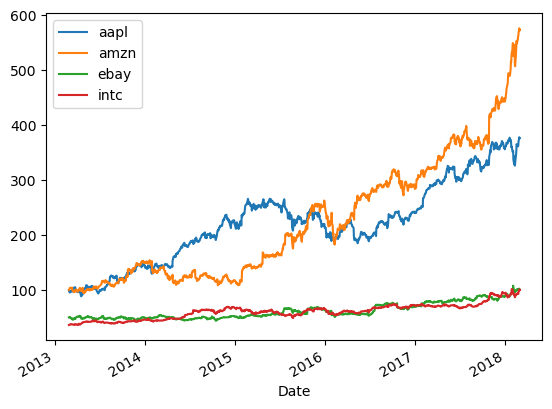

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
aapl['Adj Close'].div(aapl['Adj Close'].iloc[0]).mul(100).plot(label='aapl')
amzn['Adj Close'].div(amzn['Adj Close'].iloc[0]).mul(100).plot(label ='amzn')
ebay['AdjClose'].div(ebay.AdjClose.iloc[0]).mul(100).plot(label='ebay')
intc['AdjClose'].div(intc.AdjClose.iloc[0]).mul(100).plot(label='intc')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))



## Use pandas autocorrelation_plot() function to plot the autocorrelation of the month-end close prices of each of the stocks.  Are they autocorrelated?  Why or why not?

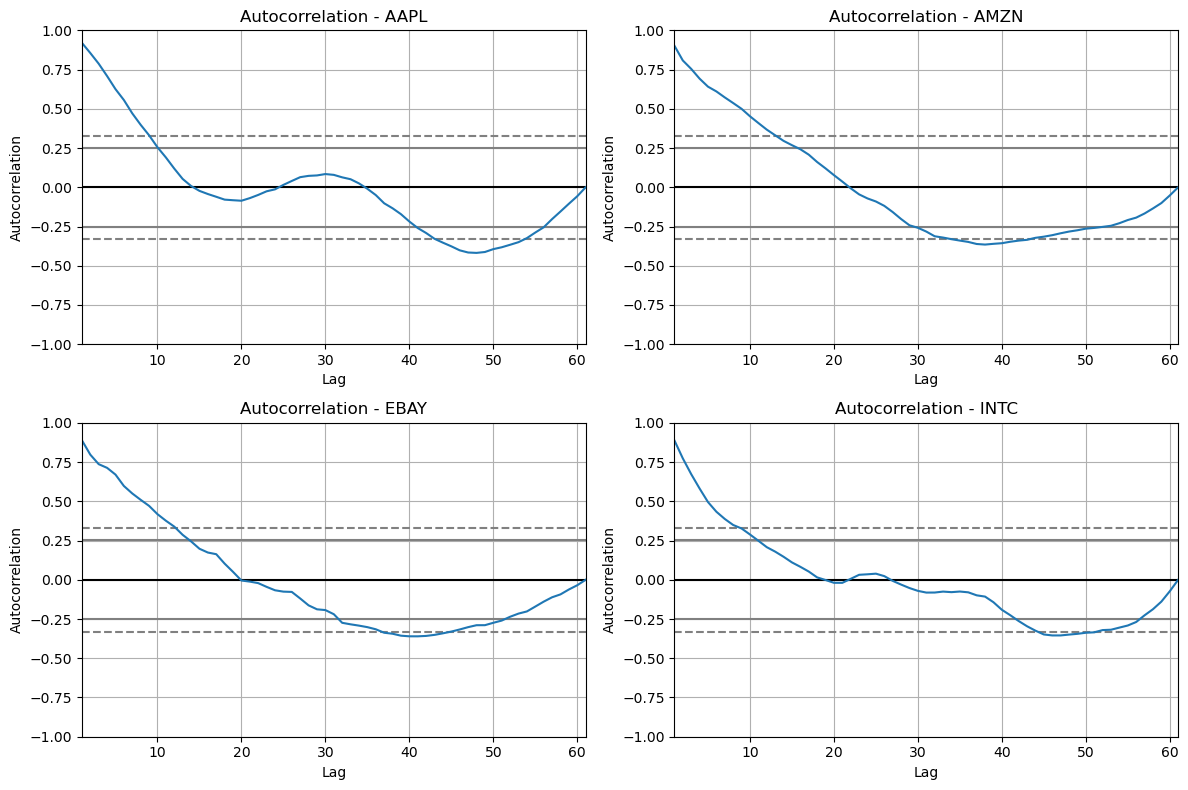

In [40]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
autocorrelation_plot(aapl_m)
plt.title('Autocorrelation - AAPL')

plt.subplot(2, 2, 2)
autocorrelation_plot(amzn_m)
plt.title('Autocorrelation - AMZN')

plt.subplot(2, 2, 3)
autocorrelation_plot(ebay_m)
plt.title('Autocorrelation - EBAY')

plt.subplot(2, 2, 4)
autocorrelation_plot(intc_m)
plt.title('Autocorrelation - INTC')

plt.tight_layout()
plt.show()


##### Yes, the month end close prices are autocorrelated.Each stock shows strong positive autocorrelation at low lags, which gradually declines indicating trend persistence and non stationary behavior typical of financial price series.

### Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting (Note: you should end up with a time series 59 months long)

In [13]:
#we can use lag instead of shift too
monthly_returns = adj_close / adj_close.shift(1) - 1 
monthly_returns = monthly_returns.dropna()
monthly_returns.head()

,AAPL,AMZN,EBAY,INTC
Date,,,,
2013-03-31,0.002855,0.008401,0.018278,0.026341
2013-04-30,0.000271,-0.047581,-0.059594,0.117592
2013-05-31,0.064703,0.060636,0.032640,0.023299
2013-06-30,-0.118293,0.031538,-0.022089,-0.016227
2013-07-31,0.141225,0.084735,-0.022966,-0.023068


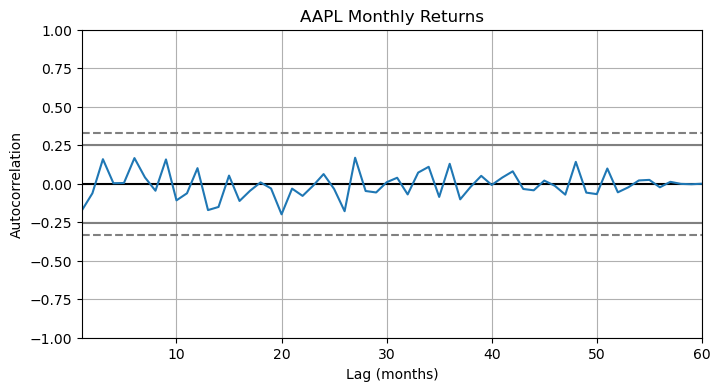

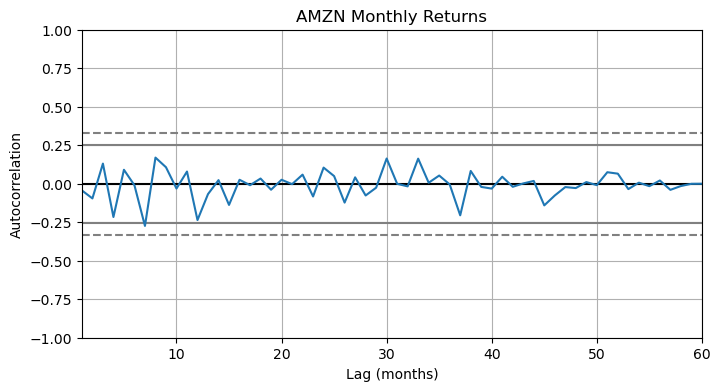

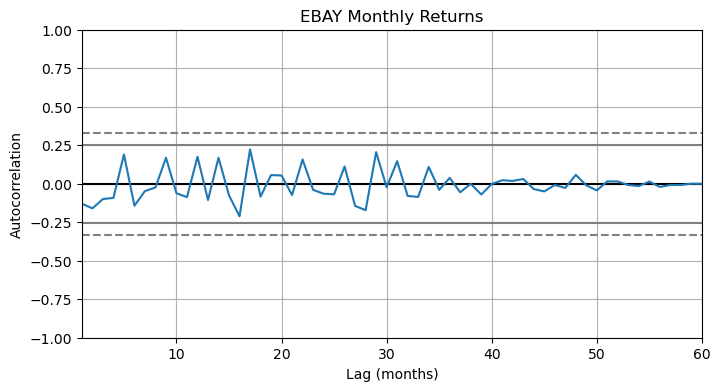

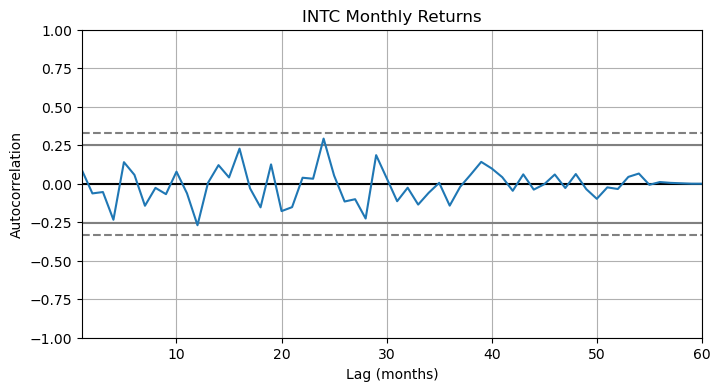

In [19]:
for col in monthly_returns.columns:
    plt.figure(figsize=(8, 4))
    autocorrelation_plot(monthly_returns[col])
    plt.xlabel("Lag (months)")
    plt.ylabel("Autocorrelation")
    plt.title(f'{col} Monthly Returns')
    plt.grid(True)
    plt.show()

##### The autocorrelation plots show that monthly returns for all four stocks are **not** significantly autocorrelated.Most autocorrelation values fall within the 95% confidence bounds.This suggests that returns behave like a random walk, with no predictable pattern from month to month. This supports the efficient market hypothesis (EMH) past returns do not reliably predict future returns.

 ## Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)

In [28]:
corr_matrix =monthly_returns.corr()
corr_matrix

,AAPL,AMZN,EBAY,INTC
AAPL,1.000000,0.271957,0.181628,0.328685
AMZN,0.271957,1.000000,0.419962,0.273703
EBAY,0.181628,0.419962,1.000000,0.305573
INTC,0.328685,0.273703,0.305573,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

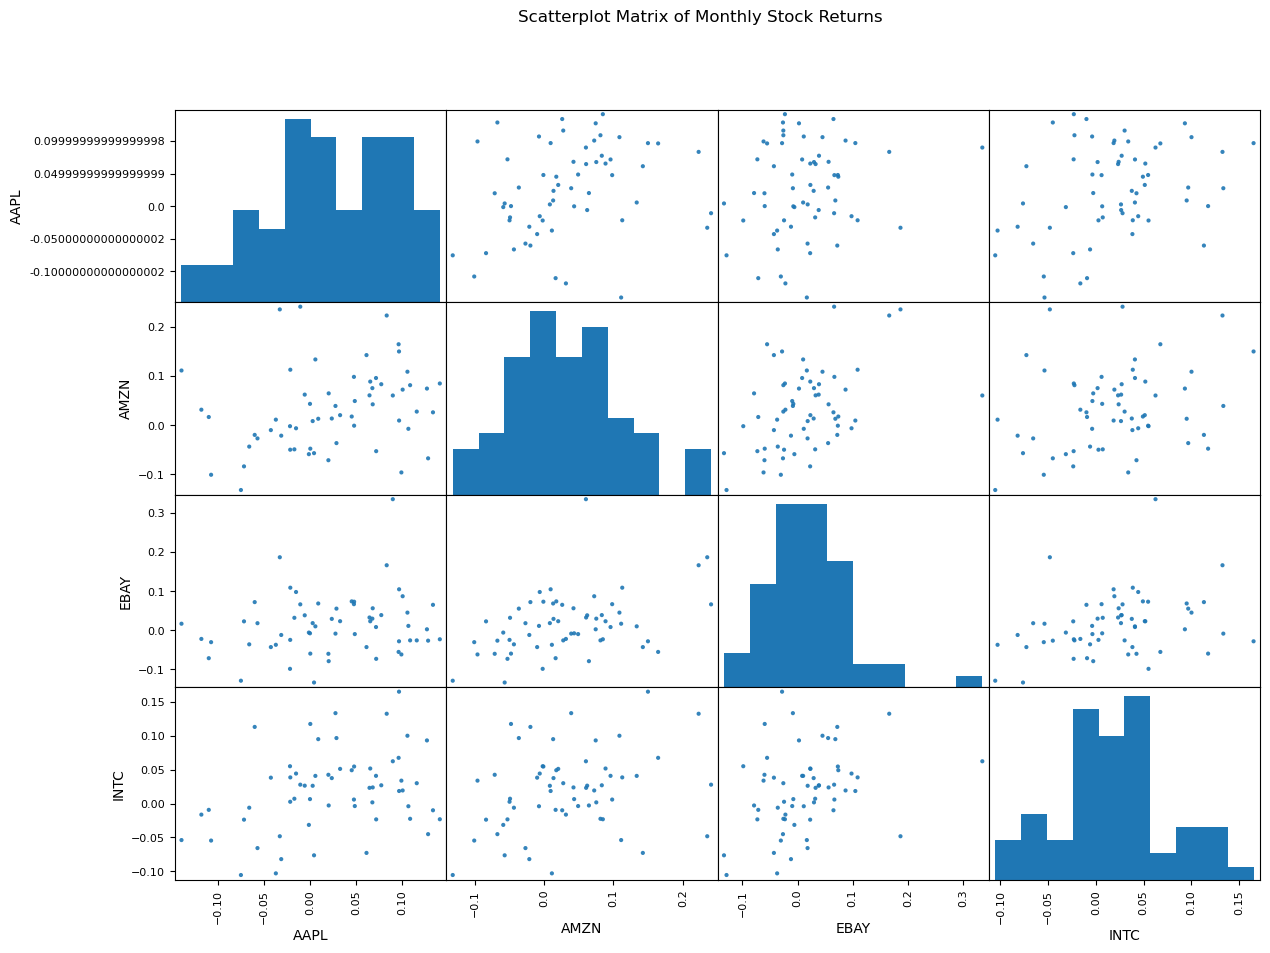

In [38]:
scatter_matrix(monthly_returns, figsize=(14,10), alpha=0.9)
plt.suptitle("Scatterplot Matrix of Monthly Stock Returns")
plt.show 

### Following the instructions in the article The Glowing PythonLinks to an external site.  visualize the correlation of the returns of all pairs of stocks (2 bonus marks)

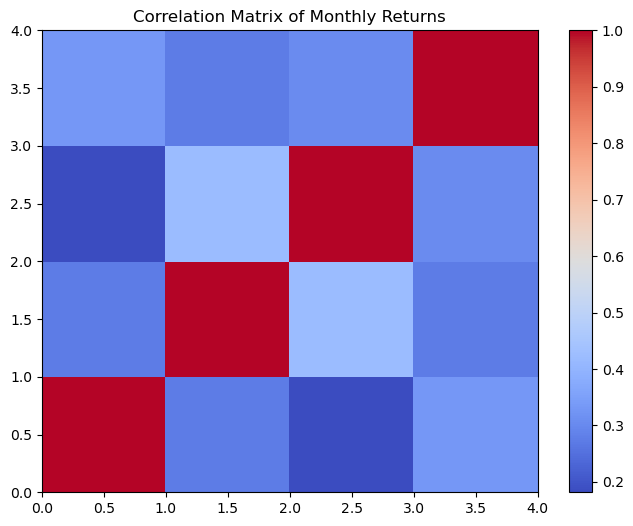

In [41]:
R = monthly_returns.corr().values
plt.figure(figsize=(8, 6))
plt.pcolor(R, cmap='coolwarm')
plt.colorbar()
tick_labels = monthly_returns.columns
plt.title("Correlation Matrix of Monthly Returns")
plt.show()